## IMPORTS AND LOADING DATA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat #cannot be used for loading because the mat version is 7.3
import h5py
import io

In [2]:
# open metadata
file_path = 'TFM_METADATA.parquet'

# Read the Parquet file as a dataframe
df = pd.read_parquet(file_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4443 entries, 0 to 4442
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              4443 non-null   float64
 1   PARTICIPANT     4443 non-null   float64
 2   T               4443 non-null   float64
 3   ET              4443 non-null   float64
 4   datasize        4443 non-null   float64
 5   PRODUCT_DH      4443 non-null   float64
 6   WEIGHT          4443 non-null   float64
 7   SPAN_1          4443 non-null   float64
 8   SPAN_2          4443 non-null   float64
 9   SHAPE_SPAN_1    4443 non-null   float64
 10  SHAPE_SPAN_2    4443 non-null   float64
 11  AD              4443 non-null   float64
 12  SPAN_DH         4443 non-null   float64
 13  GRASP_DH        4443 non-null   float64
 14  ORI_PRODUCT_DH  4443 non-null   float64
 15  ACTION_DH       4443 non-null   float64
 16  TASK_HEIGHT     4443 non-null   float64
 17  GENDER          4443 non-null   f

In [4]:
df

,ID,PARTICIPANT,T,ET,datasize,PRODUCT_DH,WEIGHT,SPAN_1,SPAN_2,SHAPE_SPAN_1,...,SPAN_DH,GRASP_DH,ORI_PRODUCT_DH,ACTION_DH,TASK_HEIGHT,GENDER,AGE,HL,FOREARM,HEIGHT
0,1.0,1.0,102.0,1.0,1216.0,1.0,461.5,75.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,53.0,173.0,240.0,162.0
1,2.0,1.0,102.0,4.0,1193.0,1.0,461.5,75.0,0.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,53.0,173.0,240.0,162.0
2,3.0,1.0,103.0,7.0,1251.0,2.0,915.0,100.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,53.0,173.0,240.0,162.0
3,4.0,1.0,103.0,10.0,1120.0,2.0,915.0,100.0,0.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,53.0,173.0,240.0,162.0
4,5.0,1.0,104.0,13.0,2542.0,3.0,713.0,74.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,53.0,173.0,240.0,162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,4439.0,26.0,341.0,587.0,2132.0,93.0,75.5,25.0,0.0,1.0,...,1.0,7.0,3.0,1.0,2.0,0.0,26.0,198.0,260.0,186.0
4439,4440.0,26.0,344.0,597.0,1742.0,81.0,228.0,78.0,11.0,2.0,...,1.0,7.0,3.0,1.0,2.0,0.0,26.0,198.0,260.0,186.0
4440,4441.0,26.0,345.0,601.0,1961.0,97.0,0.0,5.0,6.0,2.0,...,1.0,5.0,1.0,1.0,2.0,0.0,26.0,198.0,260.0,186.0
4441,4442.0,26.0,346.0,604.0,2227.0,98.0,22.7,15.0,0.0,1.0,...,1.0,7.0,2.0,1.0,2.0,0.0,26.0,198.0,260.0,186.0


In [5]:
counts_task_participant = df.groupby('T')['PARTICIPANT'].value_counts().unstack(fill_value=0)
counts_task_participant

PARTICIPANT,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
T,,,,,,,,,,,,,,,,,,,,,
102.0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,0,0,0,0
103.0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,0,0,0,0
104.0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,0,0,0,0
105.0,2,2,2,2,2,0,2,2,2,2,...,2,0,2,2,2,2,0,0,0,0
106.0,2,2,2,2,2,0,2,2,2,2,...,2,0,2,2,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341.0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
344.0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
345.0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1


## 1- PRELIMINAR ANALYSIS DATASIZE

### HISTOGRAM OF DATA SIZE (NUMBER OF SAMPLES FOR EACH EMG RECORDING)

In [6]:
# Select the column to analyze
column_data = df['datasize']
column_data

0       1216.0
1       1193.0
2       1251.0
3       1120.0
4       2542.0
         ...  
4438    2132.0
4439    1742.0
4440    1961.0
4441    2227.0
4442     974.0
Name: datasize, Length: 4443, dtype: float64

**número máximo y mínimo de samples**

In [7]:
# Print the maximum and minimum values of the column
print("Maximum num of samples:", column_data.max())
print("Minimum num of samples:", column_data.min())

Maximum num of samples: 6337.0
Minimum num of samples: 41.0


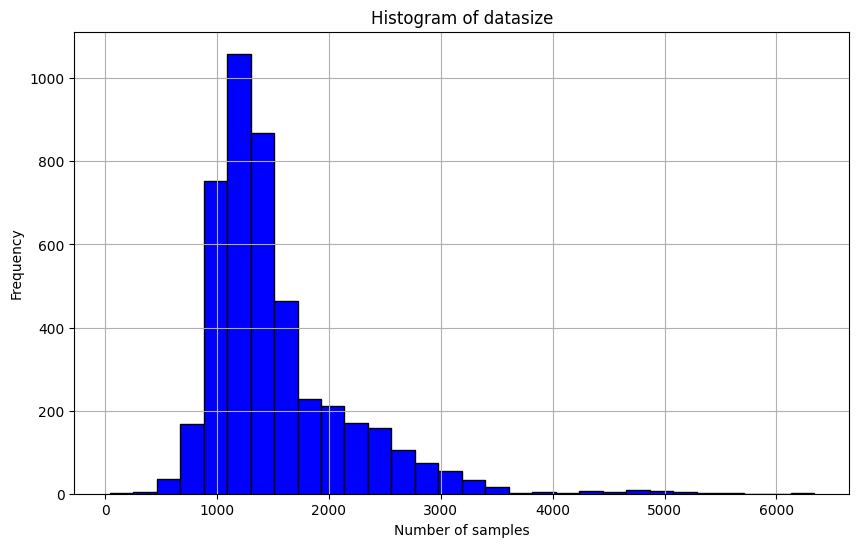

In [8]:
# histogram of the column values
plt.figure(figsize=(10, 6))
plt.hist(column_data, bins=30, color='blue', edgecolor='black')
plt.title('Histogram of ' + 'datasize')
plt.xlabel('Number of samples')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

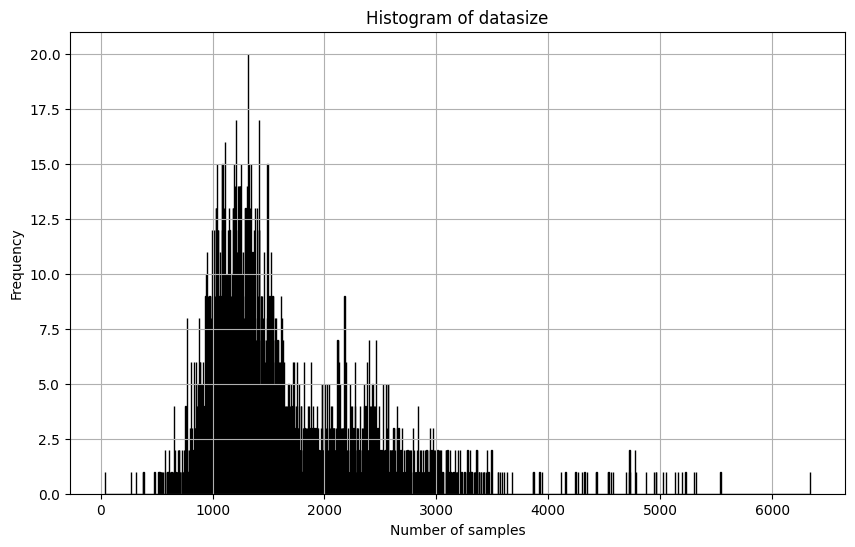

In [9]:
# histogram of the column values individual bins for each sample
plt.figure(figsize=(10, 6))
plt.hist(column_data, bins=4573, color='blue', edgecolor='black')
plt.title('Histogram of ' + 'datasize')
plt.xlabel('Number of samples')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
#To do: quitar minimo y máximo

In [10]:
column = 'datasize'


**frecuencias máximas y mínimas**

In [11]:
# Calculate the frequency of each value in the column
frequency = df[column].value_counts()

# Get the value with the maximum frequency
max_freq_value = frequency.idxmax()

# Print the most frequent value and its frequency
print("Value with the maximum frequency:", max_freq_value)
print("Frequency of this value:", frequency[max_freq_value])

Value with the maximum frequency: 1310.0
Frequency of this value: 14


In [12]:
min_freq_value = frequency.idxmin()

# Print the most frequent value and its frequency
print("Value with the minimum frequency:", min_freq_value)
print("Frequency of this value:", frequency[min_freq_value])

Value with the minimum frequency: 2983.0
Frequency of this value: 1


In [13]:
# Checking the frequencies
desired_value = 2469
filtered_df = df[df[column] == desired_value]

print(" Num of rows where", column, "is ", desired_value, ":")
#display(filtered_df)
filtered_df.info() #num of entries == frequency of the value

 Num of rows where datasize is  2469 :
<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 3947 to 3947
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              1 non-null      float64
 1   PARTICIPANT     1 non-null      float64
 2   T               1 non-null      float64
 3   ET              1 non-null      float64
 4   datasize        1 non-null      float64
 5   PRODUCT_DH      1 non-null      float64
 6   WEIGHT          1 non-null      float64
 7   SPAN_1          1 non-null      float64
 8   SPAN_2          1 non-null      float64
 9   SHAPE_SPAN_1    1 non-null      float64
 10  SHAPE_SPAN_2    1 non-null      float64
 11  AD              1 non-null      float64
 12  SPAN_DH         1 non-null      float64
 13  GRASP_DH        1 non-null      float64
 14  ORI_PRODUCT_DH  1 non-null      float64
 15  ACTION_DH       1 non-null      float64
 16  TASK_HEIGHT     1 non-null      float64
 17 

In [14]:
frequency.info()

<class 'pandas.core.series.Series'>
Index: 1625 entries, 1310.0 to 1742.0
Series name: count
Non-Null Count  Dtype
--------------  -----
1625 non-null   int64
dtypes: int64(1)
memory usage: 89.9 KB


## 2- DATA ANALYSIS (GENERAL)


### Histogram by grasp type

GRASP_DH
1.0    1713
4.0     910
2.0     624
3.0     468
7.0     260
6.0     234
8.0     130
5.0     104
Name: count, dtype: int64


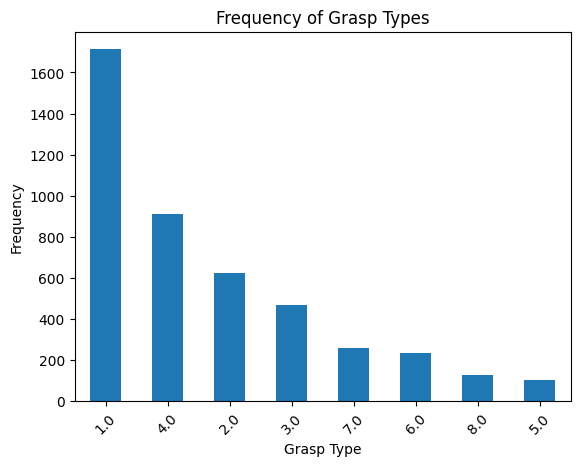

In [15]:
# Calculate value counts
grasp_counts = df['GRASP_DH'].value_counts()
print(grasp_counts)
# Plotting
grasp_counts.plot(kind='bar')
plt.title('Frequency of Grasp Types')
plt.xlabel('Grasp Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotates labels to avoid overlap
plt.show()

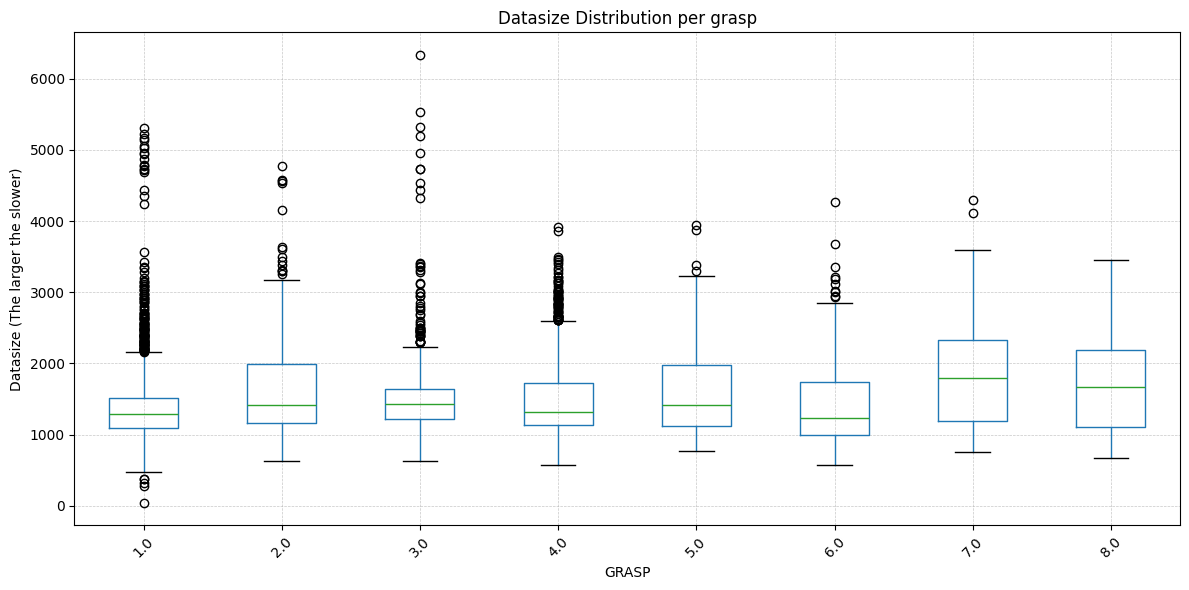

In [16]:
 # Group by 'grasp_dh' and extract the 'datasize'
datasize_per_grasp = df.groupby('GRASP_DH')['datasize'].apply(list)

# Create a DataFrame from the series within the group
datasize_df = pd.DataFrame({k: pd.Series(v) for k, v in datasize_per_grasp.items()})

# Visualizing the datasize distribution per participant with a box plot
plt.figure(figsize=(12, 6))  # Define the figure size
datasize_df.boxplot()  # Create a box plot
plt.title(f'Datasize Distribution per grasp')  # Set the title of the plot
plt.xlabel('GRASP')  # Set the x-axis label
plt.ylabel('Datasize (The larger the slower)')  # Set the y-axis label
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  # Add a grid for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()  # Show the plot

### Histogram by TASK HEIGHT

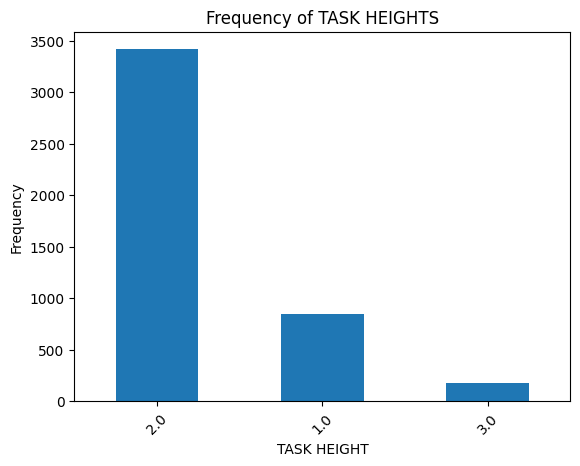

In [17]:
# Calculate value counts
t_height_counts = df['TASK_HEIGHT'].value_counts()

# Plotting
t_height_counts.plot(kind='bar')
plt.title('Frequency of TASK HEIGHTS')
plt.xlabel('TASK HEIGHT')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotates labels to avoid overlap
plt.show()

In [18]:
task_theight_counts = df.groupby('T')['TASK_HEIGHT'].value_counts().unstack(fill_value=0)
task_theight_counts

TASK_HEIGHT,1.0,2.0,3.0
T,,,
102.0,26,26,0
103.0,26,26,0
104.0,26,26,0
105.0,24,24,0
106.0,24,24,0
...,...,...,...
341.0,0,26,0
344.0,0,26,0
345.0,0,26,0


### Histogram by PARTICIPANT

[172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 165, 164, 93, 93, 89, 83, 79, 79, 79, 79]


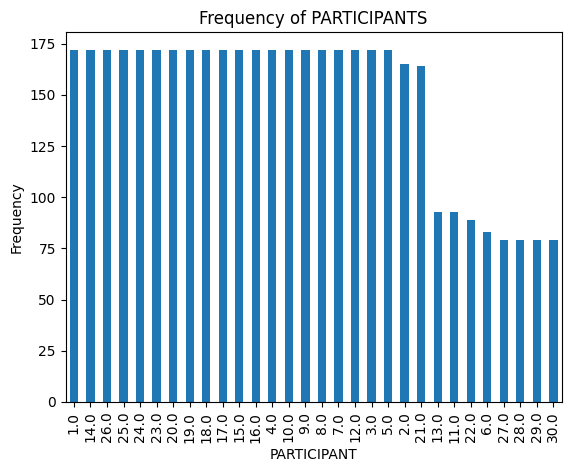

In [19]:
# Calculate value counts
participant_counts = df['PARTICIPANT'].value_counts()
print(list(participant_counts))
# Plotting
participant_counts.plot(kind='bar')
plt.title('Frequency of PARTICIPANTS')
plt.xlabel('PARTICIPANT')
plt.ylabel('Frequency')
plt.show()

In [20]:
print(participant_counts)

PARTICIPANT
1.0     172
14.0    172
26.0    172
25.0    172
24.0    172
23.0    172
20.0    172
19.0    172
18.0    172
17.0    172
15.0    172
16.0    172
4.0     172
10.0    172
9.0     172
8.0     172
7.0     172
12.0    172
3.0     172
5.0     172
2.0     165
21.0    164
13.0     93
11.0     93
22.0     89
6.0      83
27.0     79
28.0     79
29.0     79
30.0     79
Name: count, dtype: int64


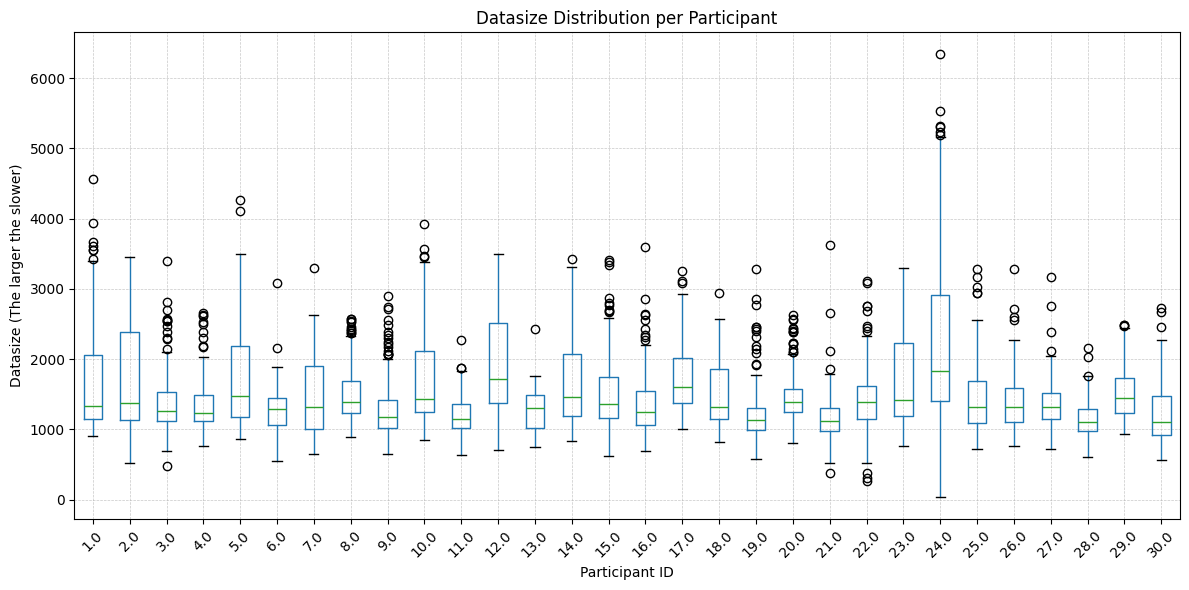

In [21]:
 # Group by 'PARTICIPANT' and extract the 'datasize'
datasize_per_participant = df.groupby('PARTICIPANT')['datasize'].apply(list)

# Create a DataFrame from the series within the group
datasize_df = pd.DataFrame({k: pd.Series(v) for k, v in datasize_per_participant.items()})

# Visualizing the datasize distribution per participant with a box plot
plt.figure(figsize=(12, 6))  # Define the figure size
datasize_df.boxplot()  # Create a box plot
plt.title(f'Datasize Distribution per Participant')  # Set the title of the plot
plt.xlabel('Participant ID')  # Set the x-axis label
plt.ylabel('Datasize (The larger the slower)')  # Set the y-axis label
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  # Add a grid for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()  # Show the plot

## 3- EXPLAINING BIMODALITY (data analysis on datasize cases)

### Histogram of datasize depending on task (T)

In [22]:
# @title task type { vertical-output: true, display-mode: "form" }
task = df['T'].unique()
print('Task types are: ')
print (task)

task_type = 102. # @param {type:"number"}

Task types are: 
[102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115.
 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127. 128. 129.
 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143.
 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154. 167. 168. 169.
 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 202. 203. 204.
 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215. 216. 217. 218.
 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229. 230. 231. 232.
 233. 234. 302. 303. 304. 305. 306. 307. 308. 309. 310. 311. 312. 316.
 317. 318. 319. 320. 321. 322. 324. 325. 326. 327. 329. 330. 331. 332.
 333. 334. 335. 336. 337. 338. 339. 340. 341. 344. 345. 346. 349.]


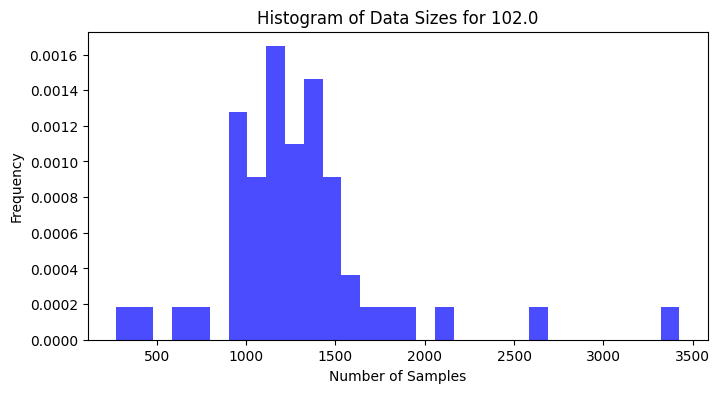

In [23]:
#task = df['T'].unique()
#print(task)
# Check if the user input is valid
if task_type in task:
    # Filter the data for the user-selected grasp type
    subset = df[df['T'] == task_type]

    # Create a plot
    plt.figure(figsize=(8, 4))  # Adjusted size for a single plot
    plt.hist(subset['datasize'], bins=30, color='blue', alpha=0.7, density=True)
    plt.title(f'Histogram of Data Sizes for {task_type}')
    plt.xlabel('Number of Samples')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Invalid task type. Please enter a valid type.")

In [24]:
len(task)

139

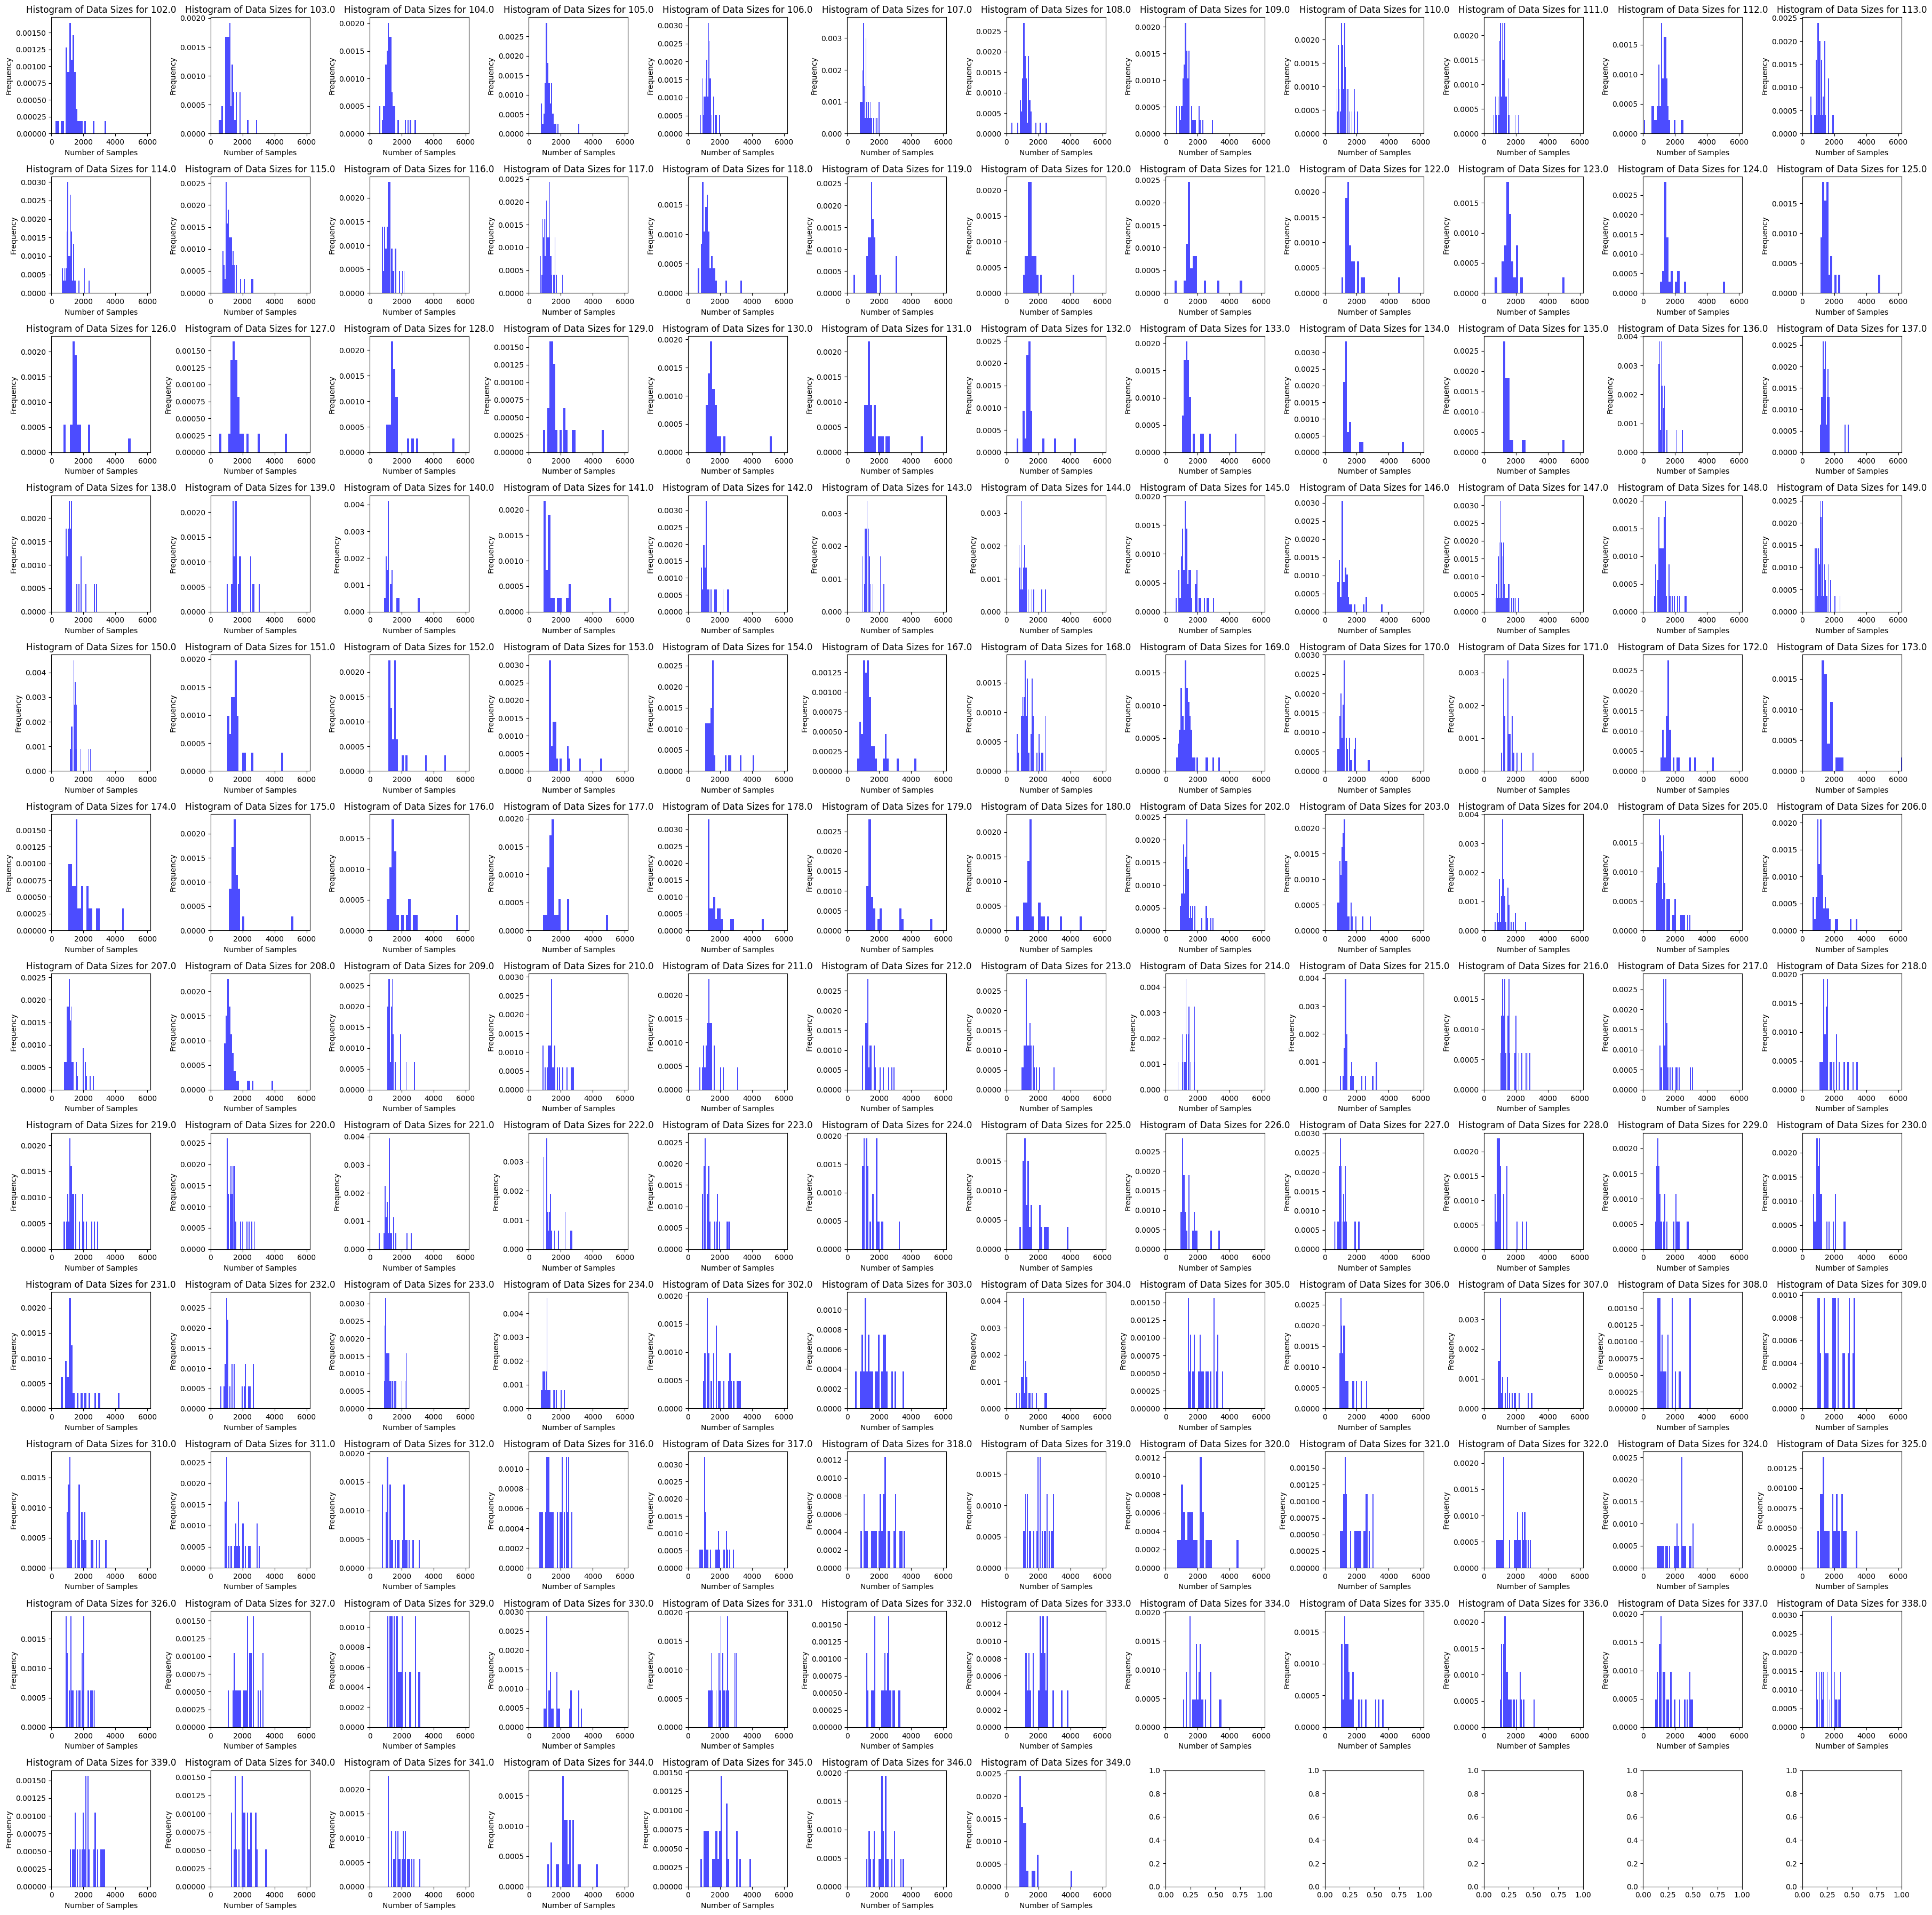

In [25]:
task_types = df['T'].unique()

# Create a figure and set of subplots
nrows = ncols = int(np.ceil(np.sqrt(144)))  # Makes a square grid large enough for all tasks

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(nrows * 3, ncols * 3))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for ax, t in zip(axes, task_types):
    subset = df[df['T'] == t]
    ax.hist(subset['datasize'], bins=30, color='blue', alpha=0.7, density=True)
    ax.set_xlim(0, 6200)

    ax.set_title(f'Histogram of Data Sizes for {t}')
    ax.set_xlabel('Number of Samples')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Histogram of datasize depending on grasp type

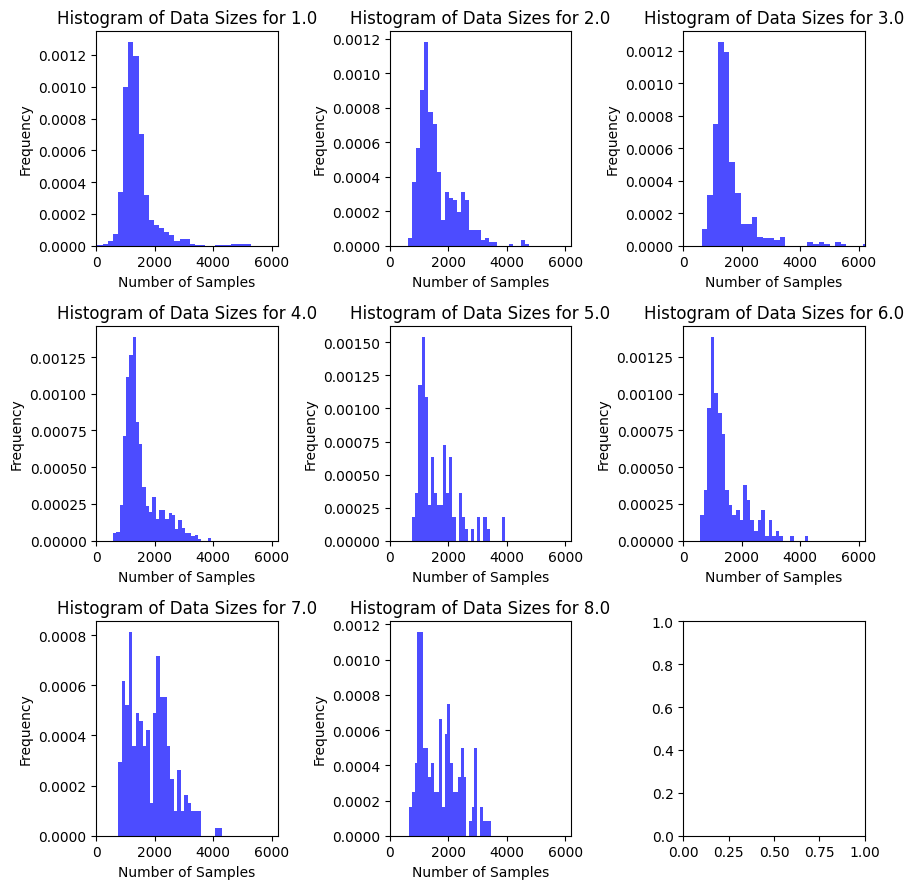

In [26]:
grasp_types = df['GRASP_DH'].unique()

# Create a figure and set of subplots
nrows = ncols = int(np.ceil(np.sqrt(9)))  # Makes a square grid large enough for all tasks

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(nrows * 3, ncols * 3))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for ax, t in zip(axes, grasp_types):
    subset = df[df['GRASP_DH'] == t]
    #print(len(subset))
    ax.hist(subset['datasize'], bins=30, color='blue', alpha=0.7, density=True)
    ax.set_xlim(0, 6200)
    #ax.set_ylim(0, 250)
    #ax.set_yscale('log')

    ax.set_title(f'Histogram of Data Sizes for {t}')
    ax.set_xlabel('Number of Samples')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Histogram of datasize depending on task height

844
3417
182


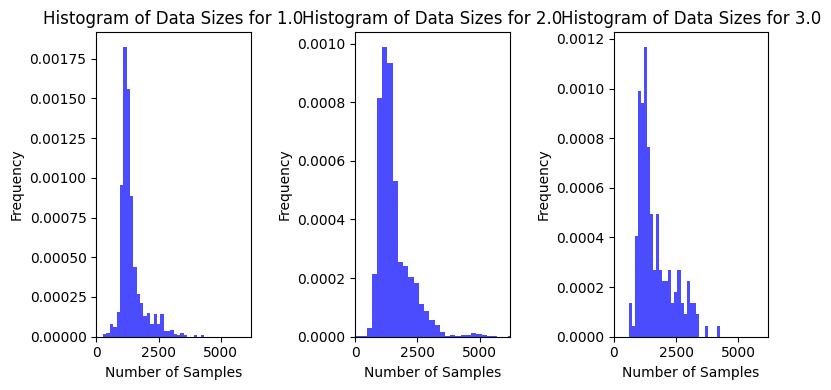

In [27]:
task_heights = df['TASK_HEIGHT'].unique()

# Create a figure and set of subplots

fig, axes = plt.subplots(ncols=3, figsize=(8,4))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for ax, t in zip(axes, task_heights):
    subset = df[df['TASK_HEIGHT'] == t]
    print(len(subset))
    ax.hist(subset['datasize'], bins=30, color='blue', alpha=0.7, density=True)
    ax.set_xlim(0, 6200)
    ax.set_title(f'Histogram of Data Sizes for {t}')
    ax.set_xlabel('Number of Samples')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Histogram of datasize depending on participant height



height bin 157.0-168.3 cm
num of rows: 1103
PARTICIPANT
1.0     172
12.0    172
16.0    172
18.0    172
19.0    172
21.0    164
29.0     79
Name: count, dtype: int64


height bin 168.3-179.7 cm
num of rows: 2319
PARTICIPANT
5.0     172
7.0     172
9.0     172
10.0    172
14.0    172
15.0    172
17.0    172
20.0    172
23.0    172
24.0    172
25.0    172
11.0     93
13.0     93
6.0      83
27.0     79
30.0     79
Name: count, dtype: int64


height bin 179.7-191.0 cm
num of rows: 1021
PARTICIPANT
3.0     172
4.0     172
8.0     172
26.0    172
2.0     165
22.0     89
28.0     79
Name: count, dtype: int64




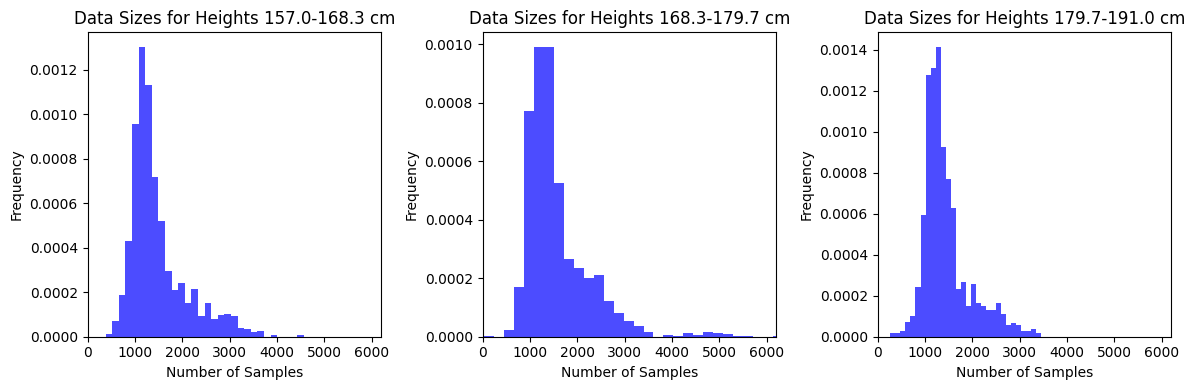

In [28]:
# Bin the height data
min_height = df['HEIGHT'].min() - 1
max_height = df['HEIGHT'].max() + 1

bins = np.linspace(min_height, max_height, num=4)
df['HEIGHT_BIN'] = pd.cut(df['HEIGHT'], bins=bins, include_lowest=True, labels=[f"{bins[i]:.1f}-{bins[i+1]:.1f}" for i in range(len(bins)-1)])

# Get the unique bins
height_bins = df['HEIGHT_BIN'].unique().categories

# Create a figure and set of subplots
fig, axes = plt.subplots(nrows=1, ncols=len(height_bins), figsize=(12, 4))  # Adjust figure size as needed
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot histograms for each height bin
for ax, bin_label in zip(axes, height_bins):
    subset = df[df['HEIGHT_BIN'] == bin_label]
    print(f'height bin {bin_label} cm')
    print('num of rows:', len(subset))
    participants = subset['PARTICIPANT'].value_counts()
    print(participants)
    print('\n')
    ax.hist(subset['datasize'], bins=30, color='blue', alpha=0.7, density= True)
    ax.set_xlim(0, 6200)
    ax.set_title(f'Data Sizes for Heights {bin_label} cm')
    ax.set_xlabel('Number of Samples')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Histogram of datasize depending on participant height AND task height


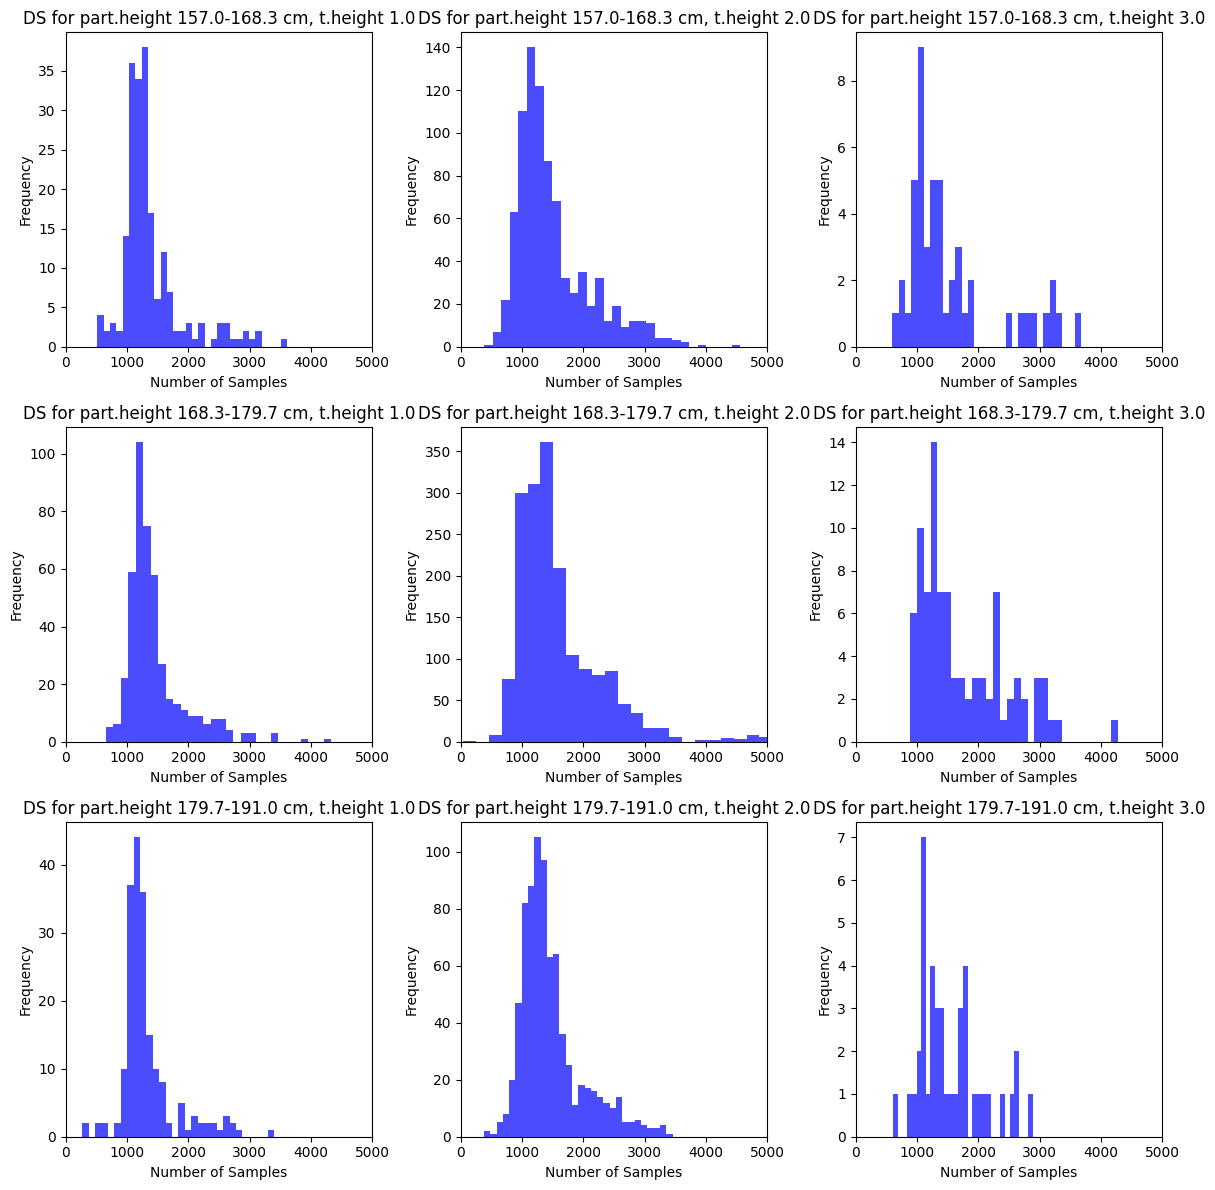

In [29]:
task_heights = df['TASK_HEIGHT'].unique()
task_heights.sort()

# Create figure and subplots
fig, axes = plt.subplots(nrows=len(height_bins), ncols=len(task_heights), figsize=(12, 4 * len(height_bins)))
axes = axes.flatten()

# Dictionary to store subsets
subsets = {}

# Iterate through each participant height bin
for i, height_bin in enumerate(height_bins):
    for j, task_height in enumerate(task_heights):
        ax = axes[i * len(task_heights) + j]  # Locate the right subplot
        subset_key = f'{height_bin}_{task_height}'
        subsets[subset_key] = df[(df['HEIGHT_BIN'] == height_bin) & (df['TASK_HEIGHT'] == task_height)]

        # Plotting
        ax.hist(subsets[subset_key]['datasize'], bins=30, color='blue', alpha=0.7)
        ax.set_xlim(0, 5000)

        ax.set_title(f'DS for part.height {height_bin} cm, t.height {task_height}')
        ax.set_xlabel('Number of Samples')
        ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


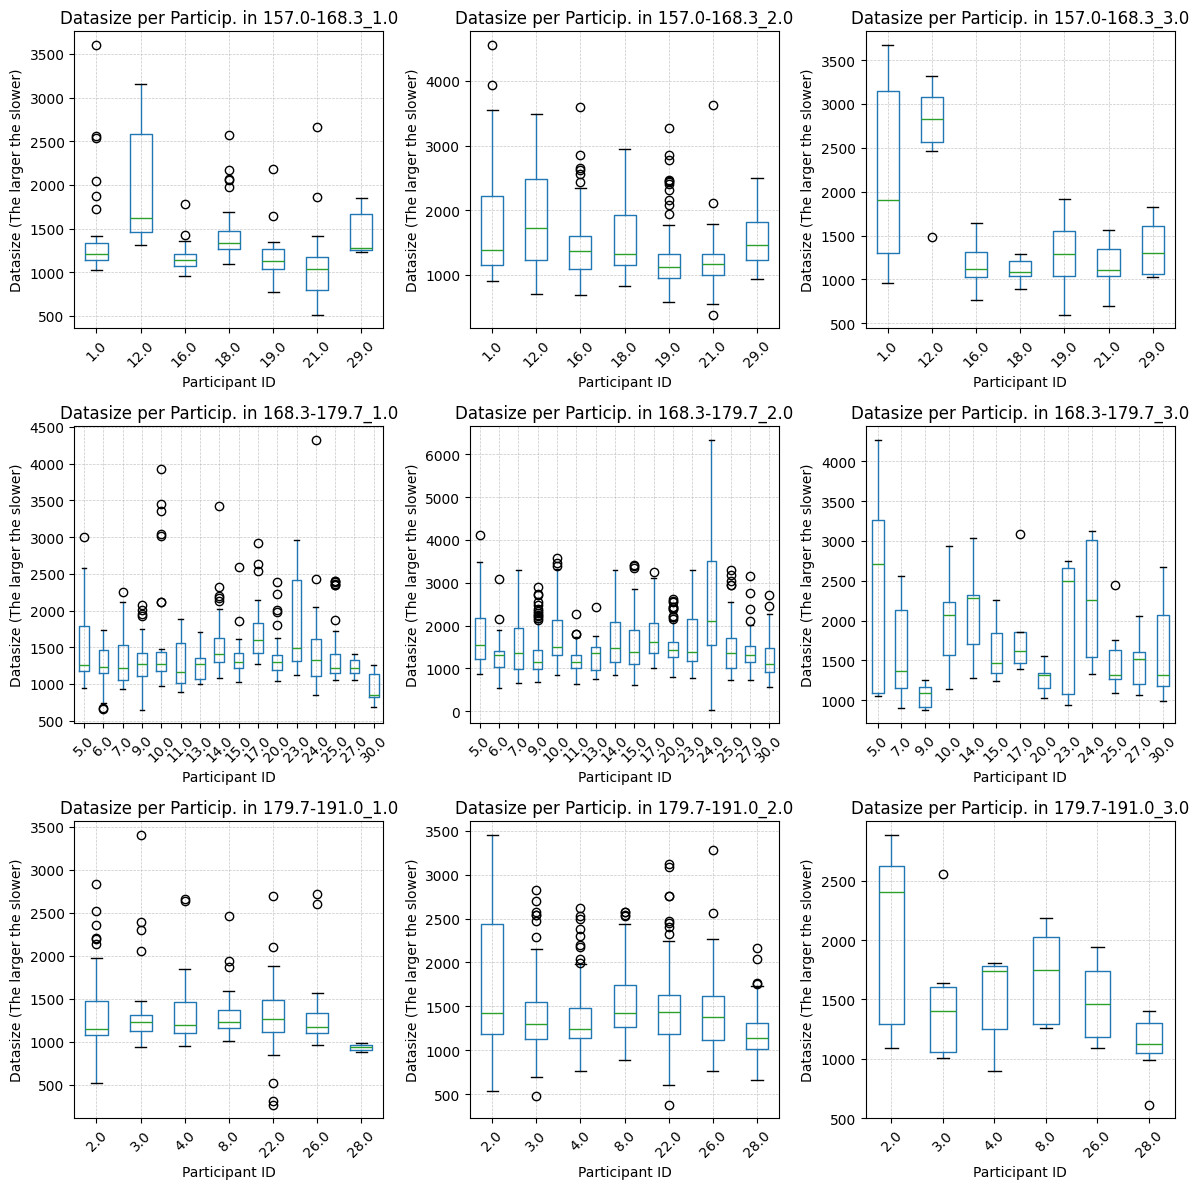

In [30]:
fig, axes = plt.subplots(nrows=len(height_bins), ncols=len(task_heights), figsize=(12, 4 * len(height_bins)), squeeze=False)
axes = axes.flatten()

for i, (key, subset) in enumerate(subsets.items()):
    # Group by 'PARTICIPANT' and extract the 'datasize'
    datasize_per_participant = subset.groupby('PARTICIPANT')['datasize'].apply(list)

    # Create a DataFrame from the series within the group
    datasize_df = pd.DataFrame({k: pd.Series(v) for k, v in datasize_per_participant.items()})

    # Plotting the boxplot on the subplot
    ax = axes[i]
    datasize_df.boxplot(ax=ax)  # Pass the subplot axis to the boxplot function
    ax.set_title(f'Datasize per Particip. in {key}')  # Set the title of the subplot
    ax.set_xlabel('Participant ID')  # Set the x-axis label of the subplot
    ax.set_ylabel('Datasize (The larger the slower)')  # Set the y-axis label of the subplot
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  # Add a grid for better readability
    ax.tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

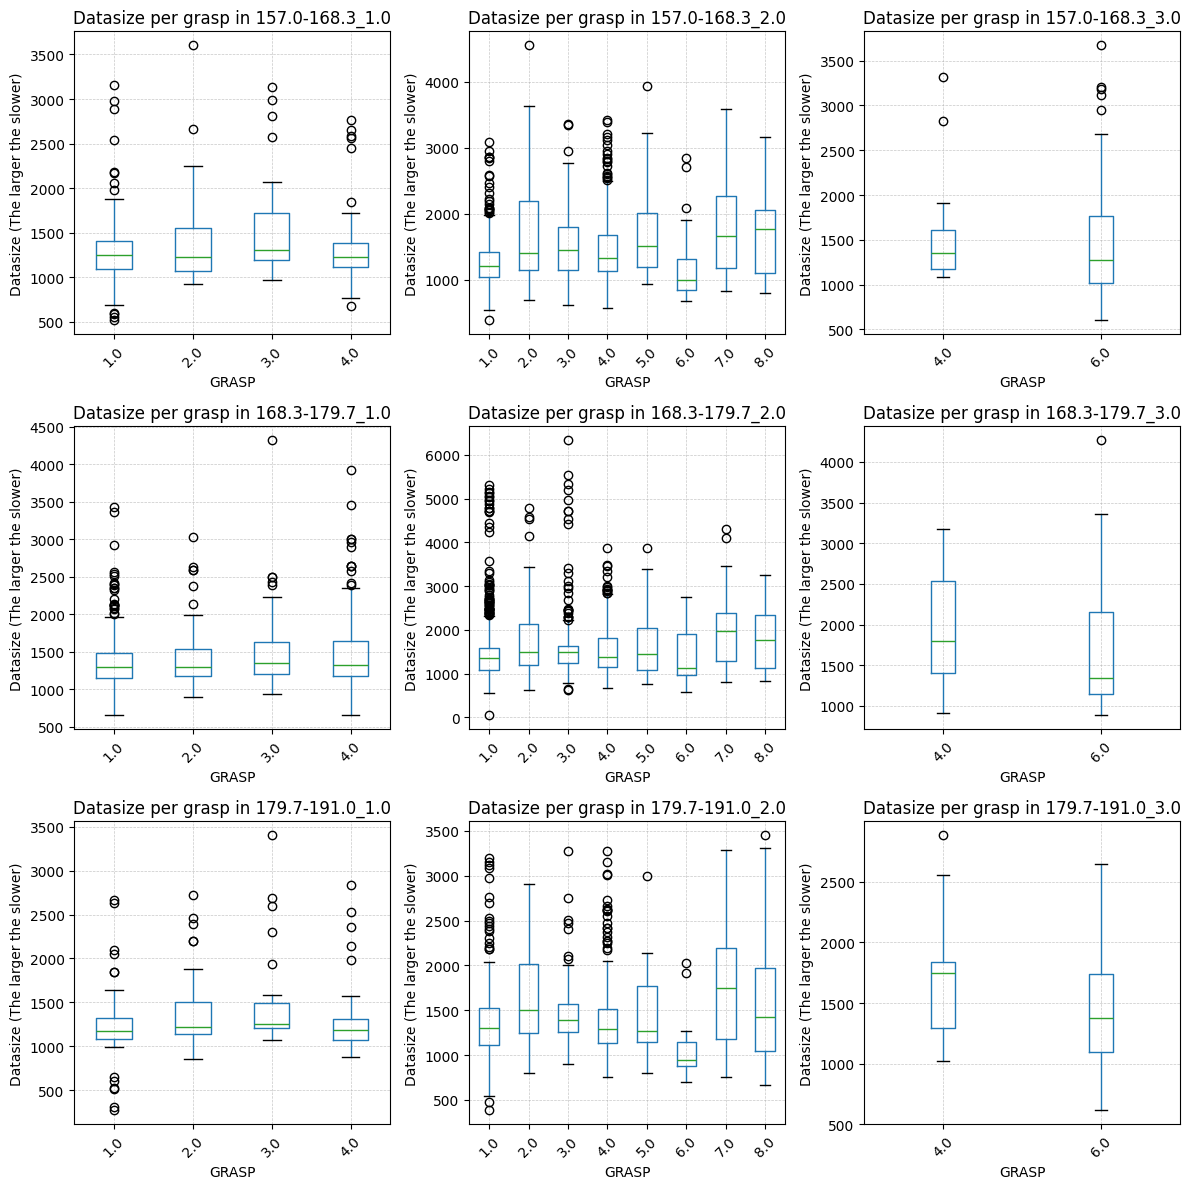

In [31]:
fig, axes = plt.subplots(nrows=len(height_bins), ncols=len(task_heights), figsize=(12, 4 * len(height_bins)), squeeze=False)
axes = axes.flatten()

for i, (key, subset) in enumerate(subsets.items()):
    # Group by 'GRASP_DH' and extract the 'datasize'
    datasize_per_grasp = subset.groupby('GRASP_DH')['datasize'].apply(list)

    # Create a DataFrame from the series within the group
    datasize_df = pd.DataFrame({k: pd.Series(v) for k, v in datasize_per_grasp.items()})

    # Plotting the boxplot on the subplot
    ax = axes[i]
    datasize_df.boxplot(ax=ax)  # Pass the subplot axis to the boxplot function
    ax.set_title(f'Datasize per grasp in {key}')  # Set the title of the subplot
    ax.set_xlabel('GRASP')  # Set the x-axis label of the subplot
    ax.set_ylabel('Datasize (The larger the slower)')  # Set the y-axis label of the subplot
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  # Add a grid for better readability
    ax.tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

In [32]:
# Print each subset
for key, subset in subsets.items():
    print(f"\nSubset for HEIGHT_BIN and TASK_HEIGHT {key}:")
    print(len(subset))
    participants = subset['PARTICIPANT'].value_counts()
    print(participants)
    print('----------'+'\n')



Subset for HEIGHT_BIN and TASK_HEIGHT 157.0-168.3_1.0:
201
PARTICIPANT
1.0     33
12.0    33
16.0    33
18.0    33
19.0    33
21.0    29
29.0     7
Name: count, dtype: int64
----------


Subset for HEIGHT_BIN and TASK_HEIGHT 157.0-168.3_2.0:
853
PARTICIPANT
1.0     132
12.0    132
16.0    132
18.0    132
19.0    132
21.0    128
29.0     65
Name: count, dtype: int64
----------


Subset for HEIGHT_BIN and TASK_HEIGHT 157.0-168.3_3.0:
49
PARTICIPANT
1.0     7
12.0    7
29.0    7
16.0    7
18.0    7
19.0    7
21.0    7
Name: count, dtype: int64
----------


Subset for HEIGHT_BIN and TASK_HEIGHT 168.3-179.7_1.0:
450
PARTICIPANT
5.0     33
7.0     33
9.0     33
10.0    33
14.0    33
15.0    33
17.0    33
20.0    33
23.0    33
24.0    33
25.0    33
11.0    26
13.0    26
6.0     21
27.0     7
30.0     7
Name: count, dtype: int64
----------


Subset for HEIGHT_BIN and TASK_HEIGHT 168.3-179.7_2.0:
1778
PARTICIPANT
5.0     132
7.0     132
9.0     132
10.0    132
14.0    132
15.0    132
17.0    1